In [49]:
# results
import torch
import os

os.chdir(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo")

results = torch.load(r"sms\exp3\results\top_10_results_db_200_index_IndexPQ_allscales.pt")

C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\3308766096.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load(r"sms\exp3\results\top_10_results_db_20

In [52]:
result_song_names = {}

for case, chunk_query_dict in results.items():
    case_results = {}
    for chunk_id, query_results in chunk_query_dict.items():
        # Create a set to keep track of songs already counted in this query
        counted_songs = set()
        for result in query_results:
            song_id = result['data'][0]
            # Only increment if we haven't counted this song for this query yet
            if song_id not in counted_songs:
                if song_id not in case_results:
                    case_results[song_id] = 1
                else:
                    case_results[song_id] += 1
                # Add the song to the set of counted songs for this query
                counted_songs.add(song_id)
    result_song_names[case] = case_results

In [53]:
sorted(result_song_names['case2_plag_melody.mid'].items(), key=lambda x: x[1], reverse=True)

[('case24_ori_melody.mid', 20),
 ('case2_ori_melody.mid', 15),
 ('case20_ori_melody.mid', 8),
 ('case4_ori_melody.mid', 6),
 ('MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_02_R1_2014_wav--2_mono.mid', 6),
 ('case27_ori_melody.mid', 5),
 ('MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO_21_R1_2014_wav--8_mono.mid', 4),
 ('MIDI-UNPROCESSED_04-07-08-10-12-15-17_R2_2014_MID--AUDIO_10_R2_2014_wav_mono.mid',
  4),
 ('case10_ori_melody.mid', 3),
 ('case1_ori_melody.mid', 3),
 ('MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_02_R1_2014_wav--5_mono.mid', 3),
 ('MIDI-Unprocessed_02_R1_2006_01-04_ORIG_MID--AUDIO_02_R1_2006_01_Track01_wav_mono.mid',
  3),
 ('MIDI-UNPROCESSED_19-20_R1_2014_MID--AUDIO_19_R1_2014_wav--2_mono.mid', 3),
 ('MIDI-UNPROCESSED_04-07-08-10-12-15-17_R2_2014_MID--AUDIO_17_R2_2014_wav_mono.mid',
  3),
 ('MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO_21_R1_2014_wav--4_mono.mid', 3),
 ('case28_ori_melody.mid', 2),
 ('MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_01_R1_2014_wav--1_mono.mid', 2),
 ('MI

In [54]:
def get_result_query_counts(results):
    result_query_counts = {}

    for case, chunk_query_dict in results.items():
        case_results = {}
        for chunk_id, query_results in chunk_query_dict.items():
            counted_songs = set()
            for result in query_results:
                song_id = result['data'][0]
                # Only increment if we haven't counted this song for this query yet
                if song_id not in counted_songs:
                    if song_id not in case_results:
                        case_results[song_id] = 1
                    else:
                        case_results[song_id] += 1
                    # Add the song to the set of counted songs for this query
                    counted_songs.add(song_id)
        result_query_counts[case] = case_results

    return result_query_counts


def analyze_plag_results(result_query_counts):
    analysis_results = {}
    
    for case, song_counts in result_query_counts.items():
        if '_plag_melody.mid' in case:
            ori_case = case.replace('_plag_melody.mid', '_ori_melody.mid')
            sorted_results = sorted(song_counts.items(), key=lambda x: x[1], reverse=True)
            
            # Find the position of the original melody
            ori_position = next((i + 1 for i, (song, _) in enumerate(sorted_results) if song == ori_case), None)
            
            if ori_position:
                analysis_results[case] = {
                    'original_case': ori_case,
                    'position': ori_position,
                    'total_songs': len(sorted_results)
                }
            else:
                analysis_results[case] = {
                    'original_case': ori_case,
                    'position': 'Not found',
                    'total_songs': len(sorted_results)
                }
    
    return analysis_results

results = torch.load(r"sms\exp3\top_20_results_db_1000_index_IndexLSH.pt")
result_query_counts = get_result_query_counts(results)
# Analyze the results
analysis = analyze_plag_results(result_query_counts)

# Print the analysis results
for case, result in analysis.items():
    print(f"{case}:")
    print(f"  Original case: {result['original_case']}")
    print(f"  Position: {result['position']}")
    print(f"  Total songs: {result['total_songs']}")
    print()

# Calculate some statistics
total_cases = len(analysis)
found_cases = sum(1 for result in analysis.values() if result['position'] != 'Not found')
avg_position = sum(result['position'] for result in analysis.values() if result['position'] != 'Not found') / found_cases if found_cases > 0 else 0

print(f"Total plagiarized cases: {total_cases}")
print(f"Cases where original was found: {found_cases}")
print(f"Average position of original (when found): {avg_position:.2f}")

case26_plag_melody.mid:
  Original case: case26_ori_melody.mid
  Position: 86
  Total songs: 107

case20_plag_melody.mid:
  Original case: case20_ori_melody.mid
  Position: 2
  Total songs: 134

case13_plag_melody.mid:
  Original case: case13_ori_melody.mid
  Position: 1
  Total songs: 29

case3_plag_melody.mid:
  Original case: case3_ori_melody.mid
  Position: 3
  Total songs: 323

case2_plag_melody.mid:
  Original case: case2_ori_melody.mid
  Position: 11
  Total songs: 144

case1_plag_melody.mid:
  Original case: case1_ori_melody.mid
  Position: 1
  Total songs: 123

case10_plag_melody.mid:
  Original case: case10_ori_melody.mid
  Position: 8
  Total songs: 104

case18_plag_melody.mid:
  Original case: case18_ori_melody.mid
  Position: 1
  Total songs: 38

case16_plag_melody.mid:
  Original case: case16_ori_melody.mid
  Position: Not found
  Total songs: 107

case6_plag_melody.mid:
  Original case: case6_ori_melody.mid
  Position: 89
  Total songs: 92

case4_plag_melody.mid:
  Origi

C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\3857504650.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load(r"sms\exp3\top_20_results_db_1000_inde

In [59]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_result_query_counts(results):
    result_query_counts = {}
    for case, chunk_query_dict in results.items():
        case_results = {}
        for chunk_id, query_results in chunk_query_dict.items():
            counted_songs = set()
            for result in query_results:
                song_id = result['data'][0]
                # Only increment if we haven't counted this song for this query yet
                if song_id not in counted_songs:
                    if song_id not in case_results:
                        case_results[song_id] = 1
                    else:
                        case_results[song_id] += 1
                    counted_songs.add(song_id)
            # If no results, ensure the case is represented
            if not query_results:
                case_results['Not found'] = 0
        result_query_counts[case] = case_results
    return result_query_counts

def analyze_plag_results(result_query_counts):
    analysis_results = {}
    for case, song_counts in result_query_counts.items():
        if '_plag_melody.mid' in case:
            ori_case = case.replace('_plag_melody.mid', '_ori_melody.mid')
            sorted_results = sorted(song_counts.items(), key=lambda x: x[1], reverse=True)
            # Find the position of the original melody
            ori_position = next((i + 1 for i, (song, _) in enumerate(sorted_results) if song == ori_case), None)
            if ori_position:
                analysis_results[case] = ori_position
            else:
                analysis_results[case] = 'Not found'
    return analysis_results

def process_result_file(result_path):
    results = torch.load(result_path)
    result_query_counts = get_result_query_counts(results)
    analysis = analyze_plag_results(result_query_counts)
    return analysis

# Load and process each result file
result_files = {
    '200_SingleScale': 'sms/exp3/results/top_10_results_db_200_index_IndexPQ_singlescale.pt',
    '200_AllScales': 'sms/exp3/results/top_10_results_db_200_index_IndexPQ_allscales.pt',
    '1000_SingleScale': 'sms/exp3/results/top_50_results_db_1000_index_IndexPQ_singlescale.pt',
    '1000_AllScales': 'sms/exp3/results/top_50_results_db_1000_index_IndexPQ_allscales.pt'
}

analysis_data = {}

for label, path in result_files.items():
    analysis = process_result_file(path)
    analysis_data[label] = analysis

# Convert to DataFrame for plotting and table generation
df_list = []
for label, analysis in analysis_data.items():
    for case, position in analysis.items():
        if position == 'Not found':
            # Assign a position value beyond the maximum possible (e.g., K+1)
            if '200' in label:
                position_val = 11  # K=10
            else:
                position_val = 51  # K=50
        else:
            position_val = position
        df_list.append({
            'Configuration': label,
            'Case': case,
            'Position': position_val
        })

df = pd.DataFrame(df_list)


C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\3603550465.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load(result_path)


In [68]:
import torch
import pandas as pd
import numpy as np

def get_result_query_counts(results):
    result_query_counts = {}
    for case, chunk_query_dict in results.items():
        case_results = {}
        for chunk_id, query_results in chunk_query_dict.items():
            counted_songs = set()
            for result in query_results:
                song_id = result['data'][0]
                # Only increment if we haven't counted this song for this query yet
                if song_id not in counted_songs:
                    if song_id not in case_results:
                        case_results[song_id] = 1
                    else:
                        case_results[song_id] += 1
                    counted_songs.add(song_id)
            # If no results, ensure the case is represented
            if not query_results:
                case_results['Not found'] = 0
        result_query_counts[case] = case_results
    return result_query_counts

def analyze_plag_results(result_query_counts):
    analysis_results = {}
    for case, song_counts in result_query_counts.items():
        if '_plag_melody.mid' in case:
            ori_case = case.replace('_plag_melody.mid', '_ori_melody.mid')
            sorted_results = sorted(song_counts.items(), key=lambda x: x[1], reverse=True)
            # Find the position of the original melody
            ori_position = next((i + 1 for i, (song, _) in enumerate(sorted_results) if song == ori_case), None)
            if ori_position:
                analysis_results[case] = ori_position
            else:
                analysis_results[case] = 'Not found'
    return analysis_results

def process_result_file(result_path):
    results = torch.load(result_path)
    result_query_counts = get_result_query_counts(results)
    analysis = analyze_plag_results(result_query_counts)
    return analysis

# Load and process each result file
result_files = {
    '200_SingleScale': 'sms/exp3/results/top_10_results_db_200_index_IndexPQ_singlescale.pt',
    '200_AllScales': 'sms/exp3/results/top_10_results_db_200_index_IndexPQ_allscales.pt',
    '1000_SingleScale': 'sms/exp3/results/top_50_results_db_1000_index_IndexPQ_singlescale.pt',
    '1000_AllScales': 'sms/exp3/results/top_50_results_db_1000_index_IndexPQ_allscales.pt'
}

analysis_data = {}

for label, path in result_files.items():
    analysis = process_result_file(path)
    analysis_data[label] = analysis

# Convert to DataFrame for table generation
df_list = []
for label, analysis in analysis_data.items():
    for case, position in analysis.items():
        if position == 'Not found':
            # Assign a position value beyond the maximum possible (e.g., K+1)
            if '200' in label:
                position_val = 11  # K=10
            else:
                position_val = 51  # K=50
        else:
            position_val = position
        df_list.append({
            'Configuration': label,
            'Case': case,
            'Position': position_val
        })

df = pd.DataFrame(df_list)

# Define K values for each configuration
config_k = {
    '200_SingleScale': 10,
    '200_AllScales': 10,
    '1000_SingleScale': 50,
    '1000_AllScales': 50
}

# Map K to each row
df['K'] = df['Configuration'].map(config_k)

# Define a 'Found' column
df['Found'] = df['Position'] <= df['K']

# Group by Configuration and calculate statistics
summary = df.groupby('Configuration').agg(
    Min=('Position', 'min'),
    Q1=('Position', lambda x: x.quantile(0.25)),
    Median=('Position', 'median'),
    Q3=('Position', lambda x: x.quantile(0.75)),
    Max=('Position', 'max'),
    Mean=('Position', 'mean'),
    Cases_Found=('Found', 'sum')
).reset_index()

# Rename columns for clarity
summary.rename(columns={
    'median': 'Median',
    'quantile_25': 'Q1',
    'quantile_75': 'Q3',
    'min': 'Min',
    'max': 'Max',
    'mean': 'Mean',
    'std': 'Std Dev',
    'count': 'Total Cases'
}, inplace=True)

# Select and reorder relevant columns
summary = summary[['Configuration', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'Mean', 'Cases_Found']]

# Convert to LaTeX table
latex_table = summary.to_latex(index=False, float_format="%.2f")

print(latex_table)


C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\3136143890.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load(result_path)


\begin{tabular}{lrrrrrrr}
\toprule
Configuration & Min & Q1 & Median & Q3 & Max & Mean & Cases_Found \\
\midrule
1000_AllScales & 1 & 2.75 & 8.00 & 30.50 & 527 & 67.60 & 16 \\
1000_SingleScale & 1 & 3.00 & 18.00 & 51.00 & 206 & 34.35 & 13 \\
200_AllScales & 1 & 1.75 & 3.00 & 8.25 & 36 & 5.95 & 18 \\
200_SingleScale & 1 & 1.00 & 2.50 & 11.00 & 43 & 9.20 & 12 \\
\bottomrule
\end{tabular}



In [67]:
df

,Configuration,Case,Position
0,200_SingleScale,case24_plag_melody.mid,3
1,200_SingleScale,case17_plag_melody.mid,1
2,200_SingleScale,case3_plag_melody.mid,2
3,200_SingleScale,case15_plag_melody.mid,11
4,200_SingleScale,case23_plag_melody.mid,13
...,...,...,...
75,1000_AllScales,case20_plag_melody.mid,1
76,1000_AllScales,case28_plag_melody.mid,8
77,1000_AllScales,case1_plag_melody.mid,3
78,1000_AllScales,case19_plag_melody.mid,2


C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\1614385294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Configuration', y='Position', data=df, palette='Set3')


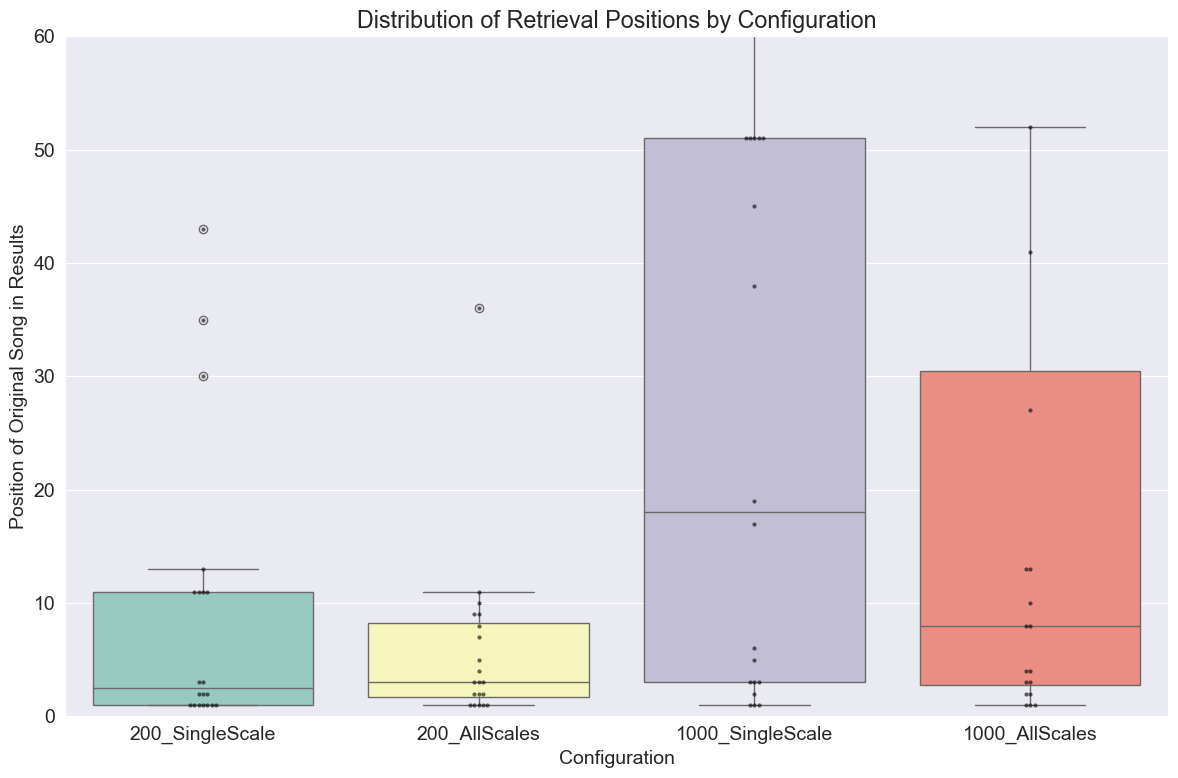

In [60]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Configuration', y='Position', data=df, palette='Set3')
sns.swarmplot(x='Configuration', y='Position', data=df, color='black', alpha=0.6, size=3)
plt.title('Distribution of Retrieval Positions by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Position of Original Song in Results')
plt.ylim(0, 60)  # Adjust based on K values
plt.tight_layout()
plt.savefig('retrieval_position_boxplot.png')
plt.show()


C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\1045787380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Configuration', y='Position', data=df, palette='Set3', inner='quartile')


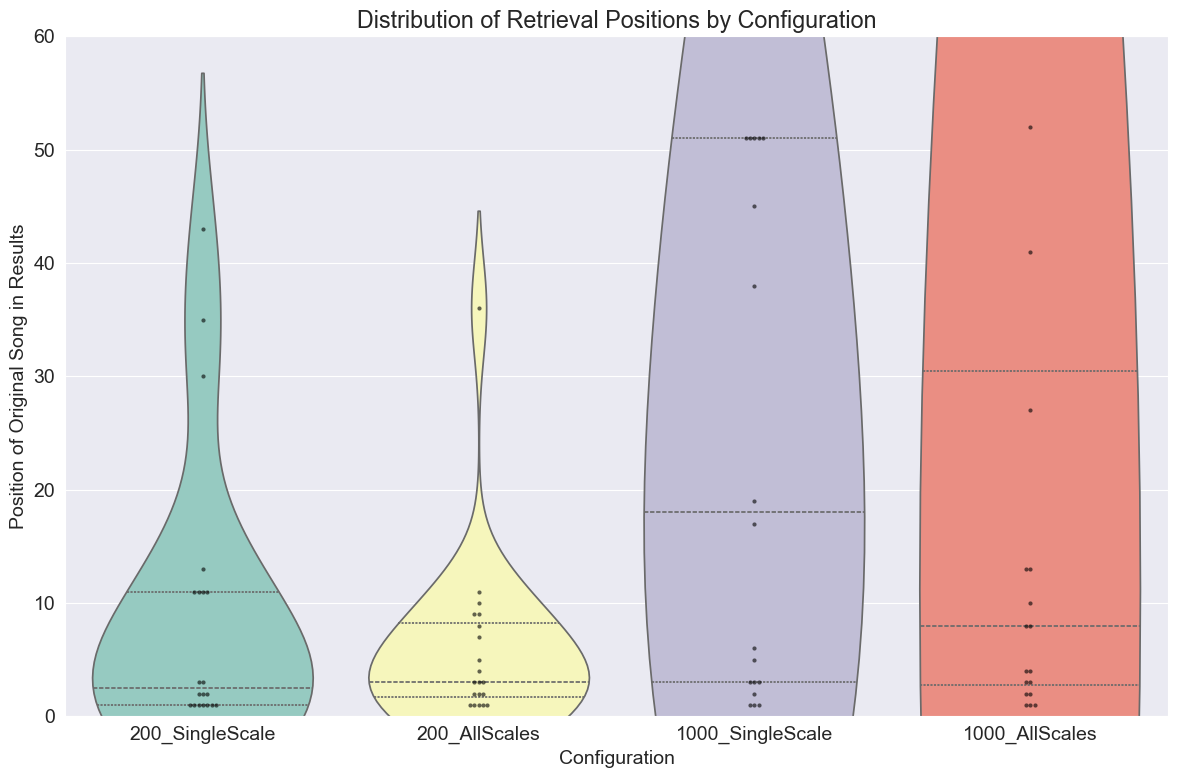

In [62]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Configuration', y='Position', data=df, palette='Set3', inner='quartile')
sns.swarmplot(x='Configuration', y='Position', data=df, color='black', alpha=0.6, size=3)
plt.title('Distribution of Retrieval Positions by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Position of Original Song in Results')
plt.ylim(0, 60)  # Adjust based on K values
plt.tight_layout()
plt.savefig('retrieval_position_violinplot.png')
plt.show()


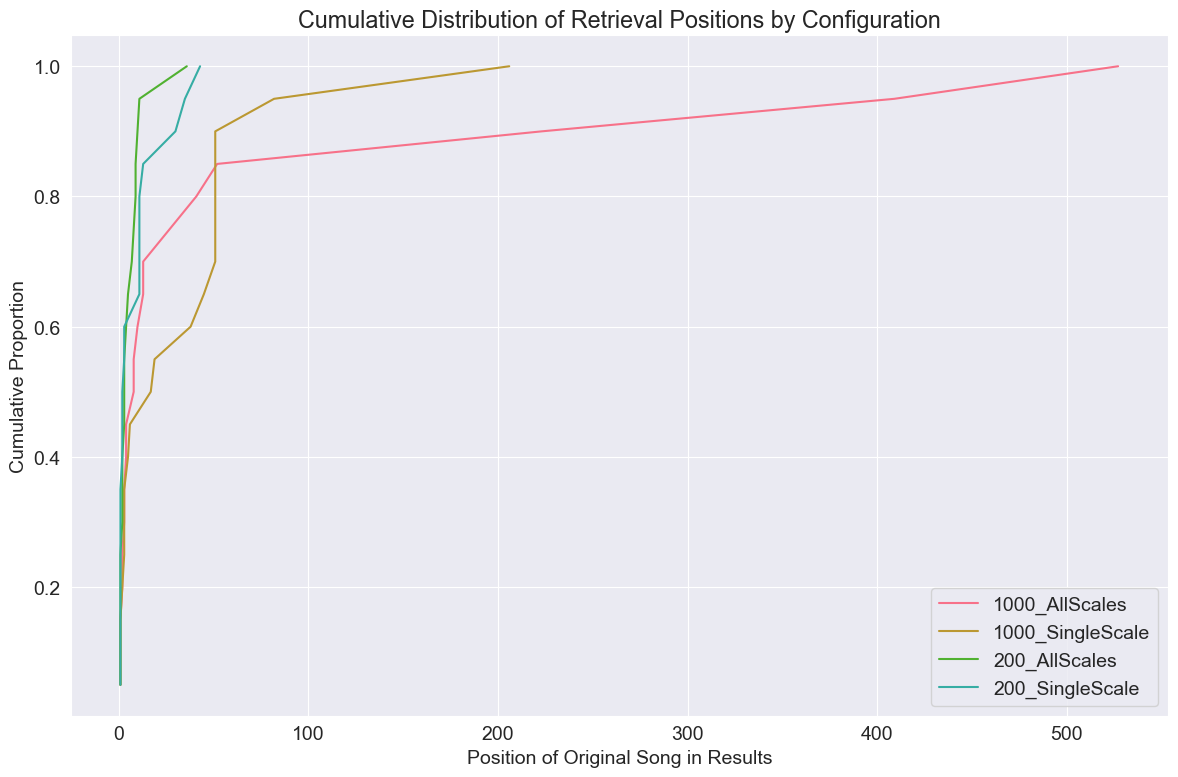

In [63]:
plt.figure(figsize=(12, 8))
for label, subset in df.groupby('Configuration'):
    sorted_positions = subset['Position'].dropna().sort_values()
    cdf = np.arange(1, len(sorted_positions)+1) / len(sorted_positions)
    plt.plot(sorted_positions, cdf, label=label)

plt.title('Cumulative Distribution of Retrieval Positions by Configuration')
plt.xlabel('Position of Original Song in Results')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('retrieval_position_cdf.png')
plt.show()


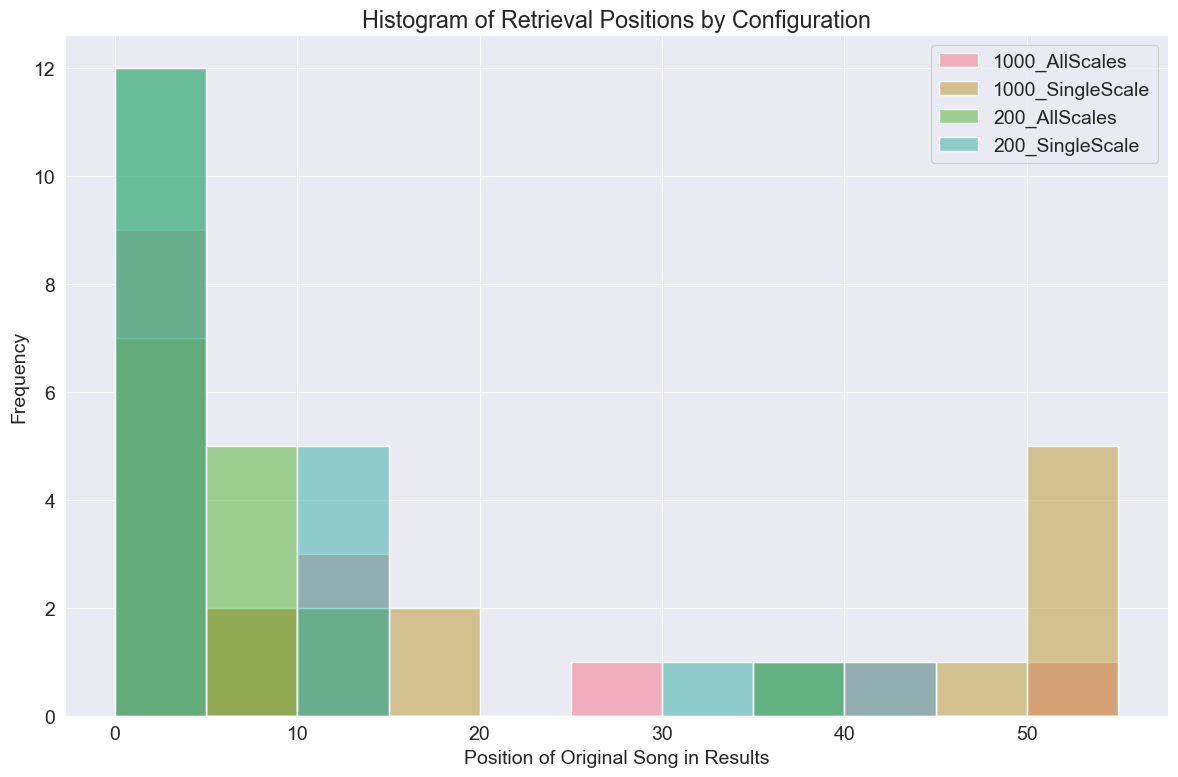

In [64]:
plt.figure(figsize=(12, 8))
for label, subset in df.groupby('Configuration'):
    sns.histplot(subset['Position'].dropna(), label=label, kde=False, bins=range(0, 60, 5), alpha=0.5)

plt.title('Histogram of Retrieval Positions by Configuration')
plt.xlabel('Position of Original Song in Results')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('retrieval_position_histogram.png')
plt.show()


In [55]:
# Function definitions (as provided)
def get_result_query_counts(results):
    result_query_counts = {}
    for case, chunk_query_dict in results.items():
        case_results = {}
        for chunk_id, query_results in chunk_query_dict.items():
            counted_songs = set()
            for result in query_results:
                song_id = result['data'][0]
                # Only increment if we haven't counted this song for this query yet
                if song_id not in counted_songs:
                    if song_id not in case_results:
                        case_results[song_id] = 1
                    else:
                        case_results[song_id] += 1
                    counted_songs.add(song_id)
            # If no results, ensure the case is represented
            if not query_results:
                case_results['No results'] = 0
        result_query_counts[case] = case_results
    return result_query_counts

def analyze_plag_results(result_query_counts):
    analysis_results = {}
    for case, song_counts in result_query_counts.items():
        if '_plag_melody.mid' in case:
            ori_case = case.replace('_plag_melody.mid', '_ori_melody.mid')
            sorted_results = sorted(song_counts.items(), key=lambda x: x[1], reverse=True)
            # Find the position of the original melody
            ori_position = next((i + 1 for i, (song, _) in enumerate(sorted_results) if song == ori_case), None)
            if ori_position:
                analysis_results[case] = {
                    'original_case': ori_case,
                    'position': ori_position,
                    'total_songs': len(sorted_results)
                }
            else:
                analysis_results[case] = {
                    'original_case': ori_case,
                    'position': 'Not found',
                    'total_songs': len(sorted_results)
                }
    return analysis_results


In [56]:
import torch
import pandas as pd
import numpy as np

# List of result files and their descriptions
result_files = [
    ('Results_200_SingleScale', 'sms/exp3/results/top_10_results_db_200_index_IndexPQ_singlescale.pt'),
    ('Results_200_AllScales', 'sms/exp3/results/top_10_results_db_200_index_IndexPQ_allscales.pt'),
    ('Results_1000_SingleScale', 'sms/exp3/results/top_50_results_db_1000_index_IndexPQ_singlescale.pt'),
    ('Results_1000_AllScales', 'sms/exp3/results/top_50_results_db_1000_index_IndexPQ_allscales.pt'),
]

# Initialize a dictionary to store DataFrames
all_analysis_results = {}

for result_name, result_path in result_files:
    results = torch.load(result_path)
    result_query_counts = get_result_query_counts(results)
    analysis = analyze_plag_results(result_query_counts)
    
    # Convert analysis to DataFrame
    data = []
    for case, result in analysis.items():
        data.append({
            'Case': case,
            'Original Song': result['original_case'],
            'Position': result['position'],
            'Total Songs Retrieved': result['total_songs']
        })
    df = pd.DataFrame(data)
    # Replace 'Not found' with NaN for numerical calculations
    df['Position'] = df['Position'].replace('Not found', np.nan)
    all_analysis_results[result_name] = df


C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\1786812673.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load(result_path)
C:\Users\cunn2\AppData\Lo

In [57]:
for result_name, df in all_analysis_results.items():
    total_cases = len(df)
    found_cases = df['Position'].notna().sum()
    percentage_found = (found_cases / total_cases) * 100
    avg_position = df['Position'].mean()
    print(f"Results for {result_name}:")
    print(f"Total cases: {total_cases}")
    print(f"Cases where original was found: {found_cases} ({percentage_found:.2f}%)")
    if found_cases > 0:
        print(f"Average position when found: {avg_position:.2f}")
    else:
        print("Average position when found: N/A")
    print()


Results for Results_200_SingleScale:
Total cases: 20
Cases where original was found: 16 (80.00%)
Average position when found: 8.75

Results for Results_200_AllScales:
Total cases: 20
Cases where original was found: 19 (95.00%)
Average position when found: 5.68

Results for Results_1000_SingleScale:
Total cases: 20
Cases where original was found: 15 (75.00%)
Average position when found: 28.80

Results for Results_1000_AllScales:
Total cases: 20
Cases where original was found: 20 (100.00%)
Average position when found: 67.60



In [58]:
summary_data = []

for result_name, df in all_analysis_results.items():
    total_cases = len(df)
    found_cases = df['Position'].notna().sum()
    percentage_found = (found_cases / total_cases) * 100
    avg_position = df['Position'].mean()
    summary_data.append({
        'Result Set': result_name,
        'Total Cases': total_cases,
        'Original Found': found_cases,
        'Percentage Found (%)': f"{percentage_found:.2f}",
        'Average Position When Found': f"{avg_position:.2f}" if avg_position is not np.nan else 'N/A'
    })

summary_df = pd.DataFrame(summary_data)

# Display the summary table
print(summary_df)


                 Result Set  Total Cases  Original Found Percentage Found (%)  \
0   Results_200_SingleScale           20              16                80.00   
1     Results_200_AllScales           20              19                95.00   
2  Results_1000_SingleScale           20              15                75.00   
3    Results_1000_AllScales           20              20               100.00   

  Average Position When Found  
0                        8.75  
1                        5.68  
2                       28.80  
3                       67.60  


In [24]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(1000000)

results_200_singlescales = torch.load(r"sms\exp3\results\top_10_results_db_200_index_IndexPQ_singlescale.pt")
results_200_allscales = torch.load(r"sms\exp3\results\top_10_results_db_200_index_IndexPQ_allscales.pt")
results_1000_singlescales = torch.load(r"sms\exp3\results\top_50_results_db_1000_index_IndexPQ_singlescale.pt")
results_1000_allscales = torch.load(r"sms\exp3\results\top_50_results_db_1000_index_IndexPQ_allscales.pt")

results_list = [results_200_singlescales, results_200_allscales, results_1000_singlescales, results_1000_allscales]

def get_analysis_for_each_method(results):

    weighted_counts = get_result_query_weighted_counts(results)
    avg_min_distances = get_result_query_average_min_distance(results)
    cumulative_distances = get_result_query_cumulative_distances(results)
    exp_weighted_counts = get_result_query_exponential_weighted_counts(results)
    hybrid_scores = get_result_query_hybrid_scores(results)
    normalized_distance_scores = get_result_query_normalized_distance_scores(results)

    weighted_counts_analysis = analyze_plag_results_weighted(weighted_counts)
    avg_min_distances_analysis = analyze_plag_results_weighted(avg_min_distances)
    cumulative_distances_analysis = analyze_plag_results_weighted(cumulative_distances)
    exp_weighted_counts_analysis = analyze_plag_results_weighted(exp_weighted_counts)
    hybrid_scores_analysis = analyze_plag_results_weighted(hybrid_scores)
    normalized_distance_scores_analysis = analyze_plag_results_weighted(normalized_distance_scores)

    analysis_dict = {
        'weighted_counts': weighted_counts_analysis,
        'avg_min_distances': avg_min_distances_analysis,
        'cumulative_distances': cumulative_distances_analysis,
        'exp_weighted_counts': exp_weighted_counts_analysis,
        'hybrid_scores': hybrid_scores_analysis,
        'normalized_distance_scores': normalized_distance_scores_analysis
    }

results_list_analysis = {}

results_list_analysis['results_200_singlescales'] = get_result_query_weighted_counts(results_200_singlescales)
results_list_analysis['results_200_allscales'] = get_result_query_weighted_counts(results_200_allscales)
results_list_analysis['results_1000_singlescales'] = get_result_query_weighted_counts(results_1000_singlescales)
results_list_analysis['results_1000_allscales'] = get_result_query_weighted_counts(results_1000_allscales)

1000000


C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\1976268922.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results_200_singlescales = torch.load(r"sms\exp3\results\top

In [25]:
import torch
import pandas as pd

# Load the results
results_200_singlescales = torch.load("sms/exp3/results/top_10_results_db_200_index_IndexPQ_singlescale.pt")
results_200_allscales = torch.load("sms/exp3/results/top_10_results_db_200_index_IndexPQ_allscales.pt")
results_1000_singlescales = torch.load("sms/exp3/results/top_50_results_db_1000_index_IndexPQ_singlescale.pt")
results_1000_allscales = torch.load("sms/exp3/results/top_50_results_db_1000_index_IndexPQ_allscales.pt")

results_list = [
    ('200 Single Scale', results_200_singlescales),
    ('200 All Scales', results_200_allscales),
    ('1000 Single Scale', results_1000_singlescales),
    ('1000 All Scales', results_1000_allscales)
]

# Define a function to compute average positions
def compute_average_positions(results, weighting_function):
    analysis = weighting_function(results)
    total_positions = []
    for case, result in analysis.items():
        position = result['position']
        if position != 'Not found':
            total_positions.append(position)
    avg_position = sum(total_positions) / len(total_positions) if total_positions else None
    return avg_position

# List of weighting methods and their corresponding functions
weighting_methods = {
    'Weighted Counts': get_result_query_weighted_counts,
    'Average Minimum Distance': get_result_query_average_min_distance,
    'Cumulative Distance': get_result_query_cumulative_distances,
    'Exponential Decay': get_result_query_exponential_weighted_counts,
    'Hybrid Approach': get_result_query_hybrid_scores,
    'Normalized Distance': get_result_query_normalized_distance_scores
}

# Prepare data for visualization
data = []

for setting_name, results in results_list:
    for method_name, method_func in weighting_methods.items():
        analysis = method_func(results)
        weighted_analysis = analyze_plag_results_weighted(analysis)
        total_positions = []
        for case, result in weighted_analysis.items():
            position = result['position']
            if position != 'Not found':
                total_positions.append(position)
        avg_position = sum(total_positions) / len(total_positions) if total_positions else None
        data.append({
            'Setting': setting_name,
            'Method': method_name,
            'Average Position': avg_position
        })

df = pd.DataFrame(data)

C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\2169929600.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results_200_singlescales = torch.load("sms/exp3/results/top_

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cunn2\\OneDrive\\DSML\\Project\\thesis-repo\\plots\\exp3_average_positions.png'

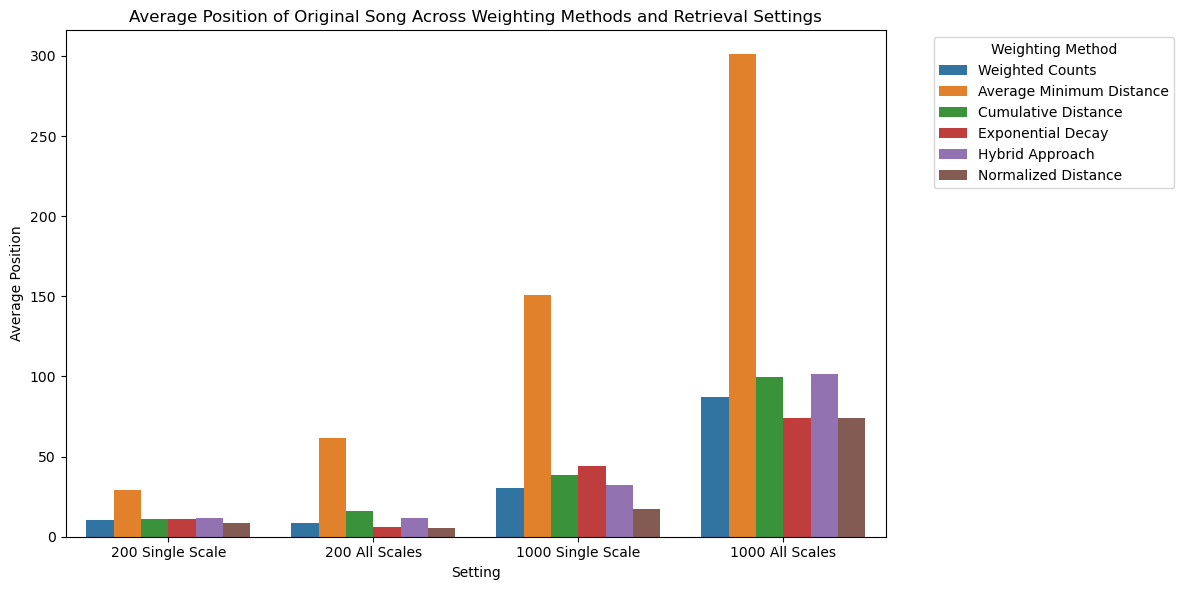

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the average positions
plt.figure(figsize=(12, 6))
sns.barplot(x='Setting', y='Average Position', hue='Method', data=df)
plt.title('Average Position of Original Song Across Weighting Methods and Retrieval Settings')
plt.ylabel('Average Position')
plt.legend(title='Weighting Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/exp3_average_positions.png')
plt.show()

C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\1399763108.py:13: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  ax = sns.barplot(x='Setting', y='Average Position', hue='Method', data=df,
C:\Users\cunn2\AppData\Local\Temp\ipykernel_88448\1399763108.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


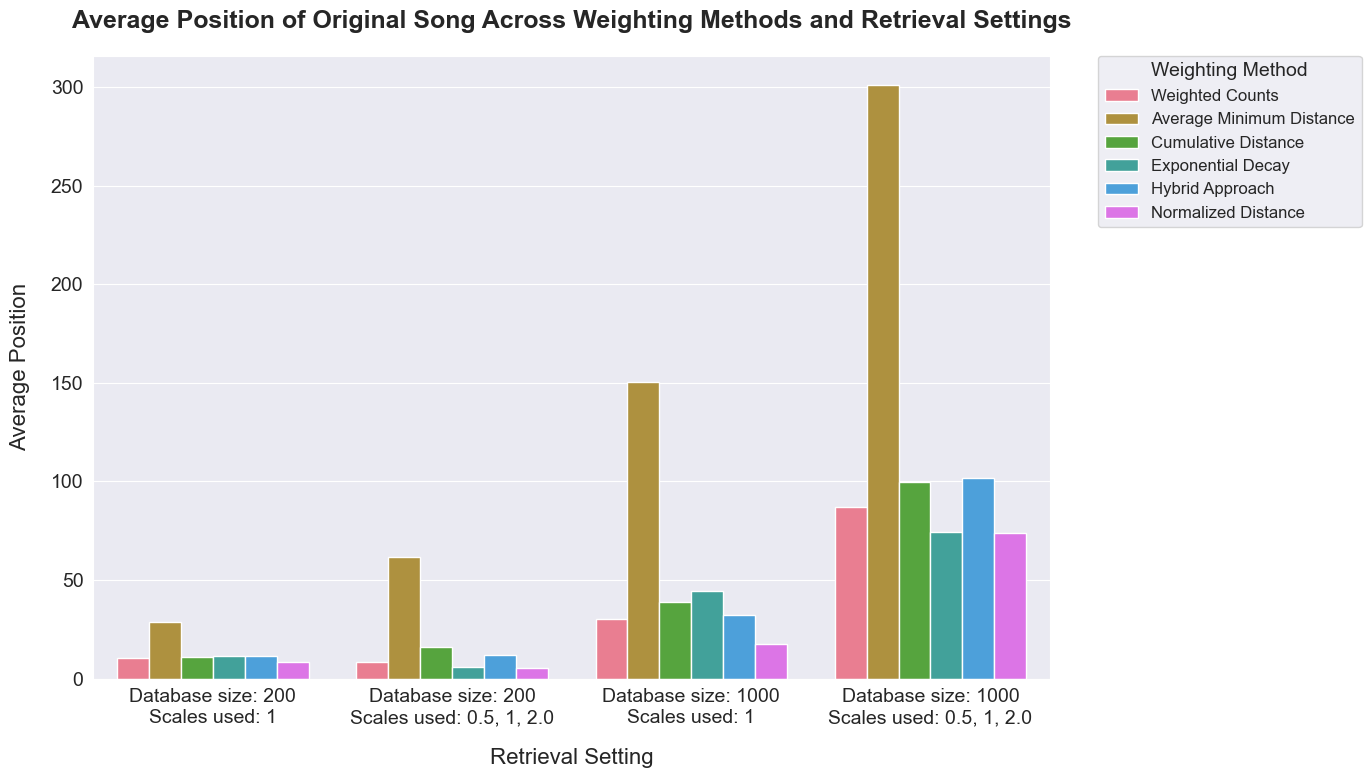

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set_style("darkgrid")
sns.set_palette("husl")

# Increase font size for better readability
plt.rcParams.update({'font.size': 14})

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Setting', y='Average Position', hue='Method', data=df, 
                 capsize=0.1, errwidth=2, saturation=0.8)

# Customize the plot
plt.title('Average Position of Original Song Across Weighting Methods and Retrieval Settings', 
          fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Average Position', fontsize=16, labelpad=15)
plt.xlabel('Retrieval Setting', fontsize=16, labelpad=15)

# Rename x-axis labels
new_labels = ['Database size: 200\nScales used: 1',
              'Database size: 200\nScales used: 0.5, 1, 2.0',
              'Database size: 1000\nScales used: 1',
              'Database size: 1000\nScales used: 0.5, 1, 2.0']
ax.set_xticklabels(new_labels)

# Adjust x-axis labels without rotation
plt.xticks(ha='center')

# Customize the legend
plt.legend(title='Weighting Method', title_fontsize='14', fontsize='12', 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [34]:
def create_latex_table(df):
    # Get unique methods
    methods = df['Method'].unique()

    # Start the LaTeX table
    latex_table = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{l|cc|cc}\n\\hline\n"

    # Add the multicolumn headers for DB size with a line underneath
    latex_table += "\\multicolumn{1}{c|}{} & \\multicolumn{2}{c|}{\\textbf{DB Size: 200}} & \\multicolumn{2}{c}{\\textbf{DB Size: 1000}} \\\\\n"
    latex_table += "\\cline{2-5}\n"

    # Add the headers for scales used with lines between columns
    latex_table += "\\multicolumn{1}{c|}{\\textbf{Weighting Method}} & "
    latex_table += "\\textbf{Scales: 1} & \\textbf{Scales: 0.5, 1, 2} & "
    latex_table += "\\textbf{Scales: 1} & \\textbf{Scales: 0.5, 1, 2} \\\\\n\\hline\n"

    # Add the data rows
    for method in methods:
        latex_table += f"{method} & "
        for setting in ['200 Single Scale', '200 All Scales', '1000 Single Scale', '1000 All Scales']:
            value = df[(df['Method'] == method) & (df['Setting'] == setting)]['Average Position'].values[0]
            latex_table += f"{value:.2f} & "
        latex_table = latex_table[:-2] + "\\\\\n"  # Remove last '& ' and add newline

    # Close the table
    latex_table += "\\hline\n\\end{tabular}\n"
    latex_table += "\\caption{Average Position of Original Song Across Weighting Methods and Retrieval Settings}\n"
    latex_table += "\\label{tab:average_positions}\n\\end{table}"

    return latex_table

# Generate the LaTeX table
latex_table = create_latex_table(df)
print(latex_table)

\begin{table}[h]
\centering
\begin{tabular}{l|cc|cc}
\hline
\multicolumn{1}{c|}{} & \multicolumn{2}{c|}{\textbf{DB Size: 200}} & \multicolumn{2}{c}{\textbf{DB Size: 1000}} \\
\cline{2-5}
\multicolumn{1}{c|}{\textbf{Weighting Method}} & \textbf{Scales: 1} & \textbf{Scales: 0.5, 1, 2} & \textbf{Scales: 1} & \textbf{Scales: 0.5, 1, 2} \\
\hline
Weighted Counts & 10.56 & 8.42 & 30.27 & 87.20 \\
Average Minimum Distance & 28.94 & 61.47 & 150.60 & 300.90 \\
Cumulative Distance & 10.81 & 16.05 & 38.73 & 99.90 \\
Exponential Decay & 11.19 & 6.11 & 44.40 & 74.25 \\
Hybrid Approach & 11.56 & 11.95 & 32.40 & 101.70 \\
Normalized Distance & 8.38 & 5.32 & 17.47 & 73.95 \\
\hline
\end{tabular}
\caption{Average Position of Original Song Across Weighting Methods and Retrieval Settings}
\label{tab:average_positions}
\end{table}
